In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly as py 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import os
import warnings

In [2]:
df = pd.read_csv('D:\Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Serial No.  GRE Score  TOEFL Score  University Rating    SOP   LOR   \
0         False      False        False              False  False  False   
1         False      False        False              False  False  False   
2         False      False        False              False  False  False   
3         False      False        False              False  False  False   
4         False      False        False              False  False  False   
..          ...        ...          ...                ...    ...    ...   
395       False      False        False              False  False  False   
396       False      False        False              False  False  False   
397       False      False        False              False  False  False   
398       False      False        False              False  False  False   
399       False      False        False              False  False  False   

      CGPA  Research  Cha

In [4]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Removing unwanted columns

In [6]:
del df['Serial No.']

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Importance of GRE score for getting admitted in abroad for masters

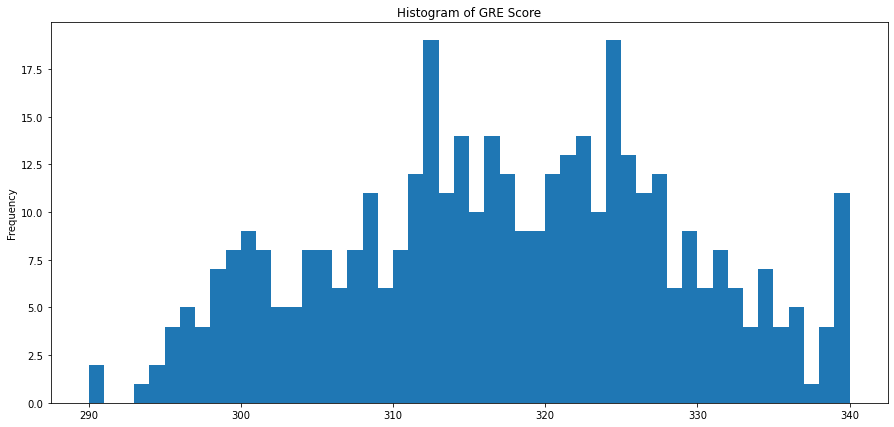

In [8]:
plt.figure(1 , figsize = (15 , 7))
df['GRE Score'].plot(kind = 'hist' , bins = 50)
plt.title('Histogram of GRE Score')
plt.show()

In [9]:
print('minimum GRE score =', df['GRE Score'].min())
print('average GRE score =', df['GRE Score'].mean())
print('maximum GRE score =', df['GRE Score'].max())

minimum GRE score = 290
average GRE score = 316.8075
maximum GRE score = 340


## Importance of TOEFL score for getting admitted in abroad for masters

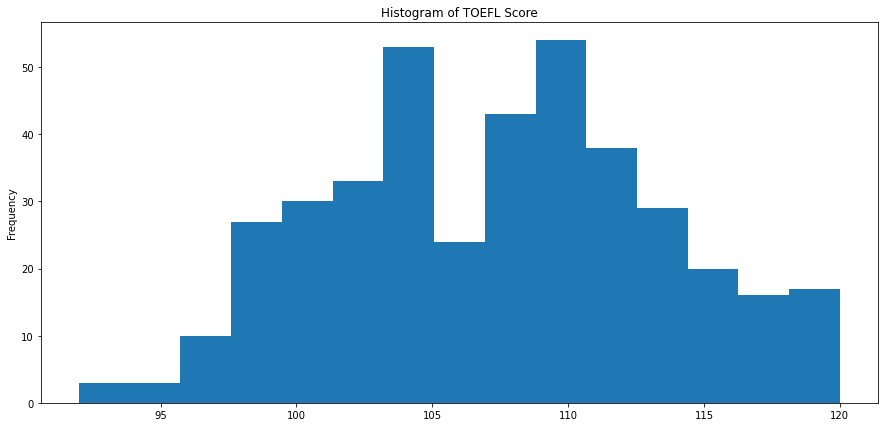

In [10]:
plt.figure(1 , figsize = (15 , 7))
df['TOEFL Score'].plot(kind = 'hist' , bins = 15)
plt.title('Histogram of TOEFL Score')
plt.show()

In [11]:
print('minimum TOEFL score =', df['TOEFL Score'].min())
print('average TOEFL score =', df['TOEFL Score'].mean())
print('maximum TOEFL score =', df['TOEFL Score'].max())

minimum TOEFL score = 92
average TOEFL score = 107.41
maximum TOEFL score = 120


## Importance of SOP & LOR for getting admitted in abroad for masters

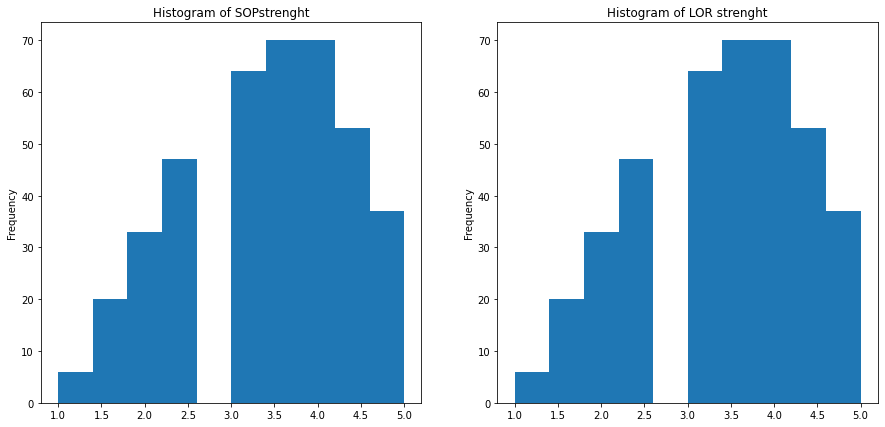

In [12]:
plot_val = ['SOP' ,'LOR ']
plt.figure(1 , figsize = (15 , 7 ))
n = 0
for i in plot_val:
    n += 1
    plt.subplot(1 , 2 , n)
    df['SOP'].plot(kind = 'hist')
    plt.title('Histogram of '+i+'strenght')
plt.show()

In [13]:
print('average SOP rating  =', df['SOP'].mean())
print('average LOR rating  =', df['LOR '].mean())

average SOP rating  = 3.4
average LOR rating  = 3.4525


## Importance of Research experience for getting admitted in abroad for masters

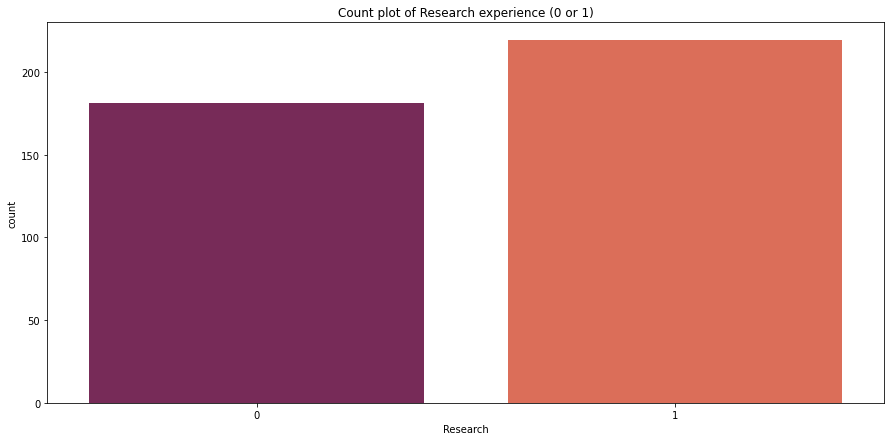

In [33]:
plt.figure(1, figsize = (15 , 7))
sns.countplot(x = 'Research' , data =  df , palette = 'rocket')
plt.title('Count plot of Research experience (0 or 1)')
plt.show()

## Uiversity ranking

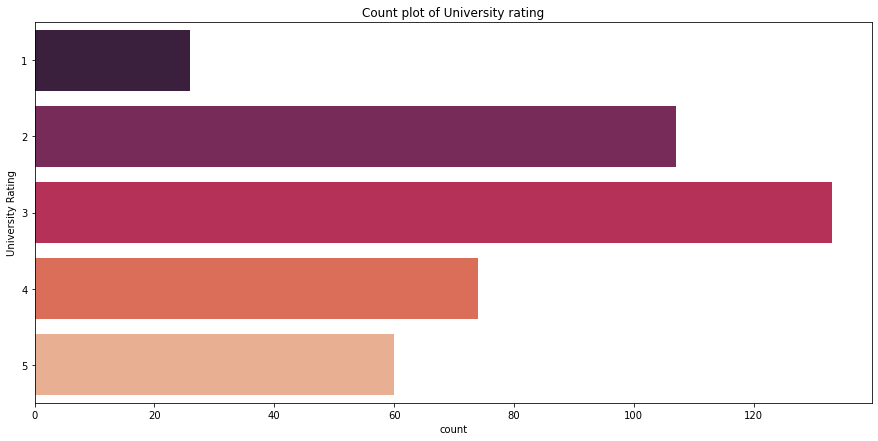

In [15]:
plt.figure(1 , figsize = (15 , 7) )
sns.countplot(y = 'University Rating' , data  = df , palette = 'rocket')
plt.title('Count plot of University rating')
plt.show()

## Distribution of chance of admit

C:\Users\Kushal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


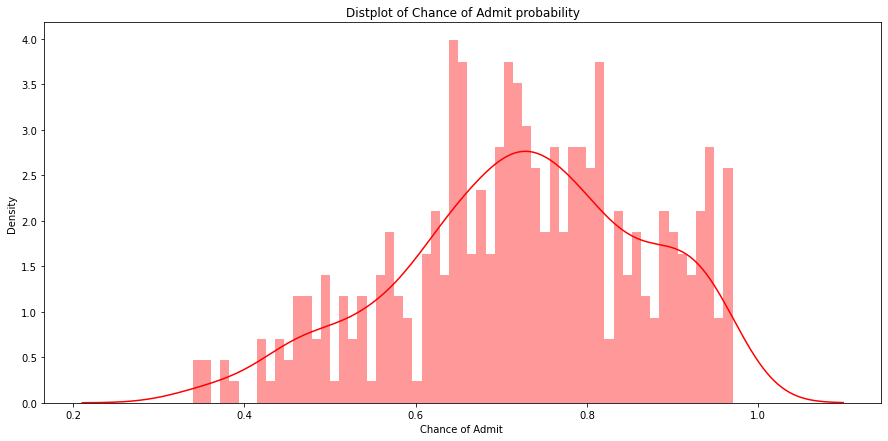

In [16]:
plt.figure(1 , figsize =  (15 , 7))
sns.distplot(a = df['Chance of Admit '] , bins = 59 , color = 'r')
plt.title('Distplot of Chance of Admit probability')
plt.show()

## Correlation between variables

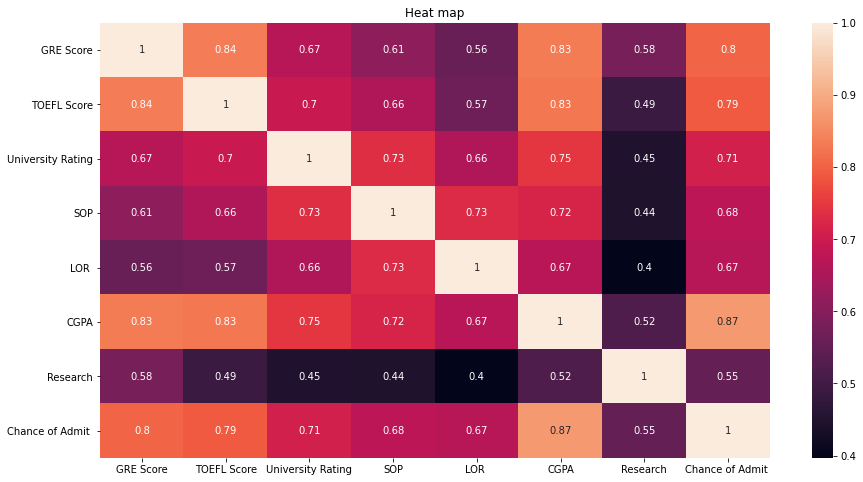

In [17]:
cor = df.corr()
plt.figure(1 , figsize = (15 , 8))
sns.heatmap(cor , annot = True )
plt.title('Heat map')
plt.show()

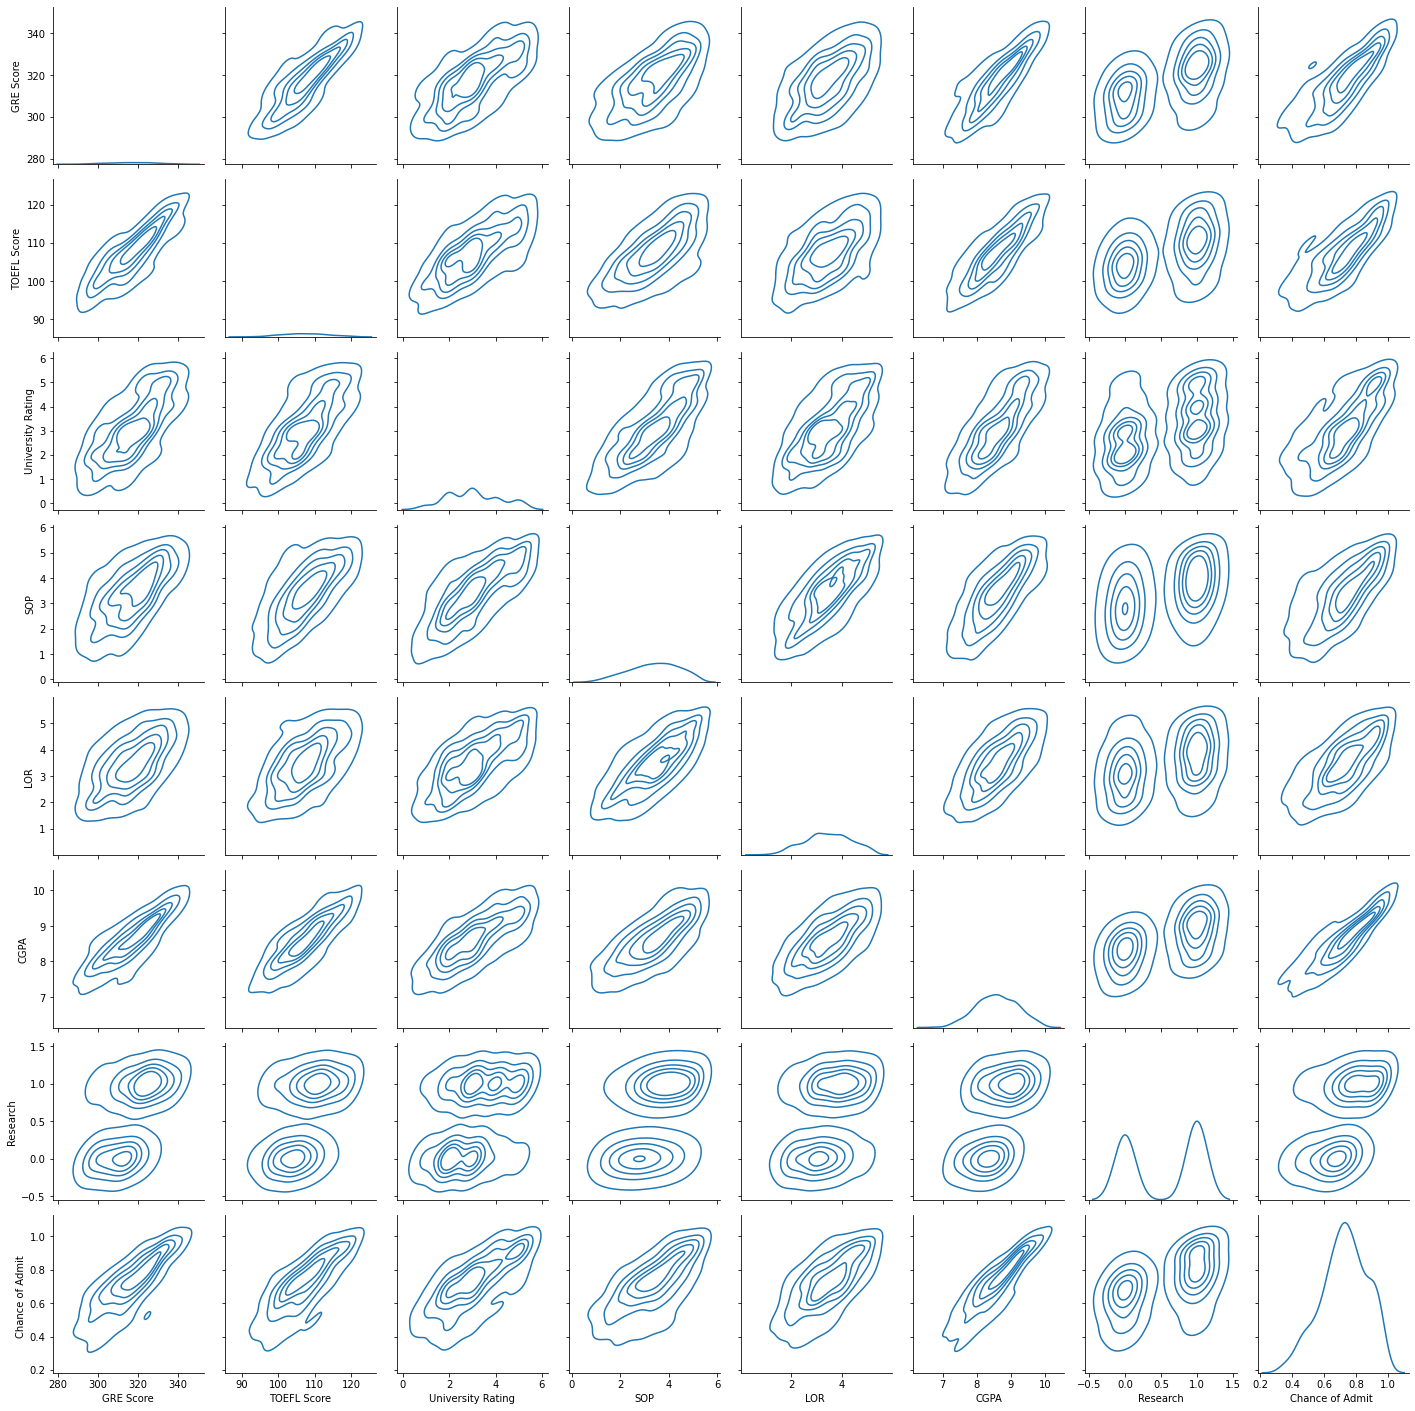

In [18]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

## CGPA and its relation with GRE score , TOEFL score and Chance of Admit

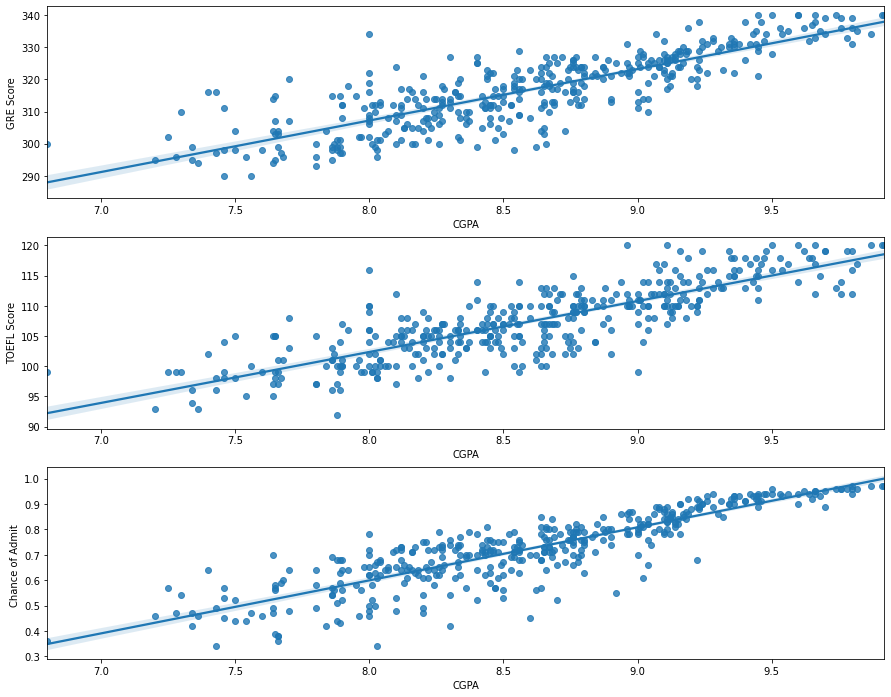

In [19]:
plot_val  = ['GRE Score' , 'TOEFL Score' , 'Chance of Admit ']
plt.figure(1,  figsize  = (15 , 12))
n = 0 
for i in plot_val:
    n += 1 
    plt.subplot(3 , 1 , n )
    sns.regplot(x = 'CGPA' , y = i , data = df)
plt.show()

## chance of admit acoording to cgpa

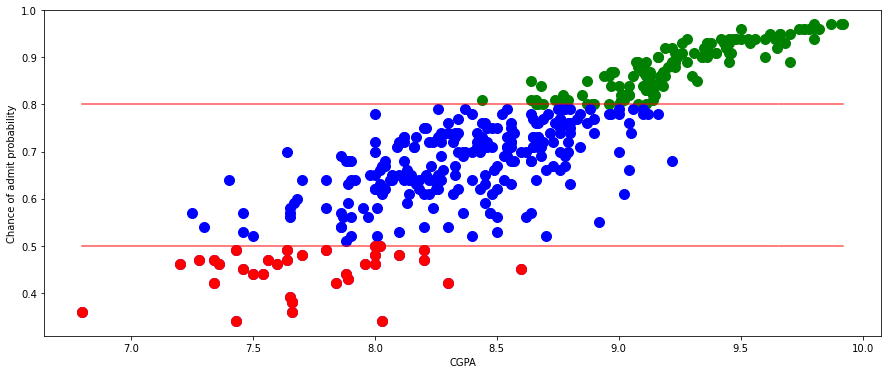

In [20]:
plt.figure(1 , figsize = (15 , 6))
for n in [0.5 , 0.8]:
    plt.plot(df['CGPA'],np.ones((df.shape[0] , 1))*n,'r-' , alpha = 0.5)

plt.scatter(x = 'CGPA' ,y = 'Chance of Admit ' , data = df.where(df['Chance of Admit '] >= 0.80),
           s = 100 , marker = 'o' , c = 'green')
plt.scatter(x = 'CGPA' ,y = 'Chance of Admit ' , data = df.where(df['Chance of Admit '] < 0.80),
           s = 100 , marker = 'o', c = 'blue')
plt.scatter(x = 'CGPA' ,y = 'Chance of Admit ' , data = df.where(df['Chance of Admit '] < 0.51),
           s = 100 , marker = 'o', c = 'red')
plt.xlabel('CGPA')
plt.ylabel('Chance of admit probability')
plt.show()

## chance of admit acoording to GRE score

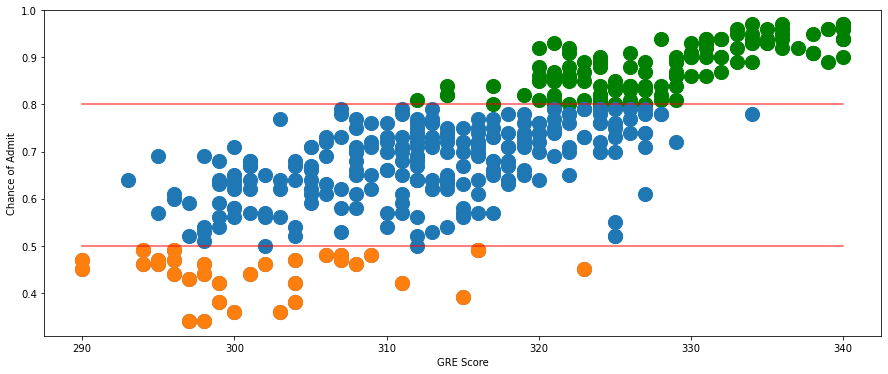

In [21]:
plt.figure(1 , figsize = (15 , 6))
for n in [0.5 , 0.8]:
    plt.plot(df['GRE Score'],np.ones((df.shape[0] , 1))*n,'r-' , alpha = 0.5)
plt.scatter(x = 'GRE Score' , y = 'Chance of Admit ' , data = df.where(df['Chance of Admit '] >= 0.8),
           c = 'green' , s = 200)
plt.scatter(x = 'GRE Score' , y = 'Chance of Admit ' , data = df.where(df['Chance of Admit '] < 0.8),
            s = 200)
plt.scatter(x = 'GRE Score' , y = 'Chance of Admit ' , data = df.where(df['Chance of Admit '] < 0.5),
            s = 200)

plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()

## chance of admit acoording to TOEFL score

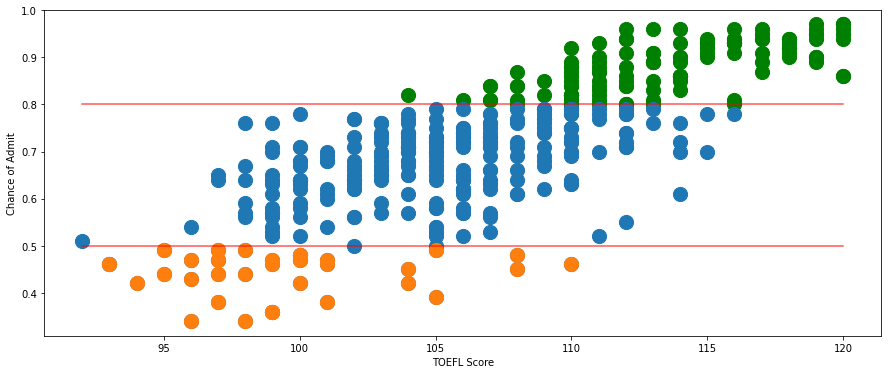

In [22]:
plt.figure(1 , figsize = (15 , 6))
for n in [0.5 , 0.8]:
    plt.plot(df['TOEFL Score'],np.ones((df.shape[0] , 1))*n,'r-' , alpha = 0.5)
plt.scatter(x = 'TOEFL Score' , y  = 'Chance of Admit ' ,
            data = df.where(df['Chance of Admit '] >= 0.8) , s = 200 , c = 'green')
plt.scatter(x = 'TOEFL Score' , y  = 'Chance of Admit ' ,
            data = df.where(df['Chance of Admit '] < 0.8) , s = 200)
plt.scatter(x = 'TOEFL Score' , y  = 'Chance of Admit ' ,
            data = df.where(df['Chance of Admit '] < 0.5) , s = 200 )
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.show()

## GRE score acoording to cgpa

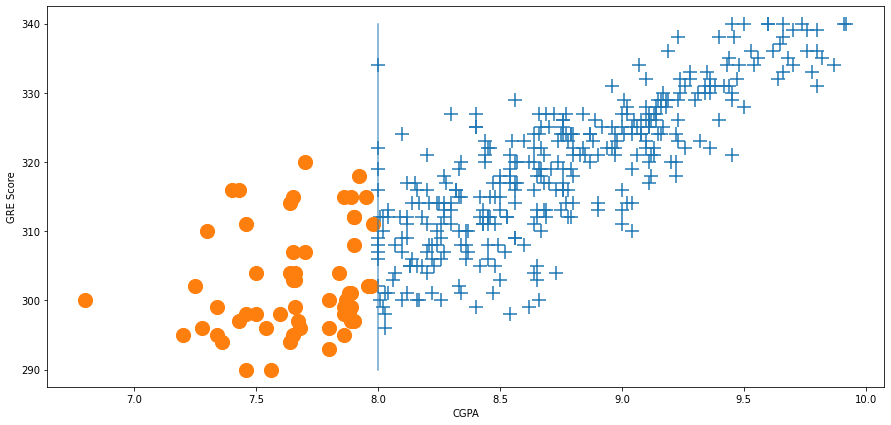

In [23]:
plt.figure(1 , figsize = (15 , 7))
plt.plot(np.ones((df.shape[0] , 1))*8 , df['GRE Score'] , '-' , alpha = 0.5 )
plt.scatter(x = 'CGPA' , y = 'GRE Score' , data = df.where(df['CGPA'] >=8) , s = 200 ,
           marker = '+')
plt.scatter(x = 'CGPA' , y = 'GRE Score' , data = df.where(df['CGPA'] < 8) ,s =  200,
           marker = 'o')
plt.xlabel('CGPA')
plt.ylabel('GRE Score')
plt.show()

## toefl score according to gre score

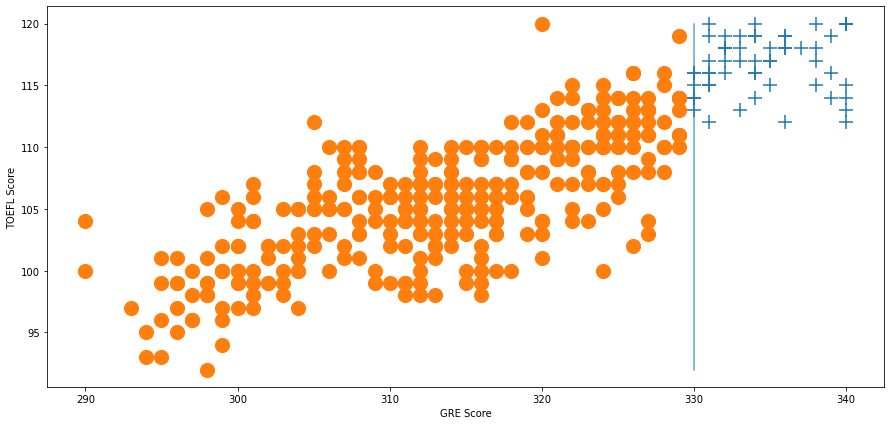

In [24]:
plt.figure(1 , figsize = (15 , 7))
plt.plot(np.ones((df.shape[0] , 1))*330 , df['TOEFL Score'] , '-' , alpha = 0.5 )
plt.scatter(x = 'GRE Score' , y = 'TOEFL Score' , data = df.where(df['GRE Score'] >=330) ,
            s = 200 , marker = '+')
plt.scatter(x = 'GRE Score' , y = 'TOEFL Score' , data = df.where(df['GRE Score'] < 330) ,
            s =  200,marker = 'o')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.show()

## According to university rankings

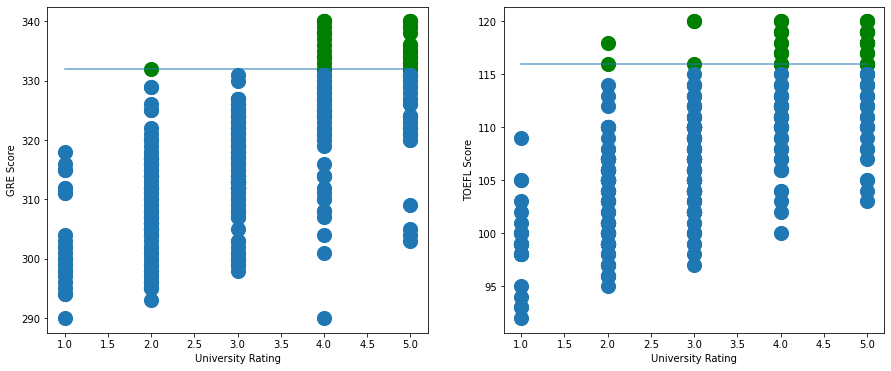

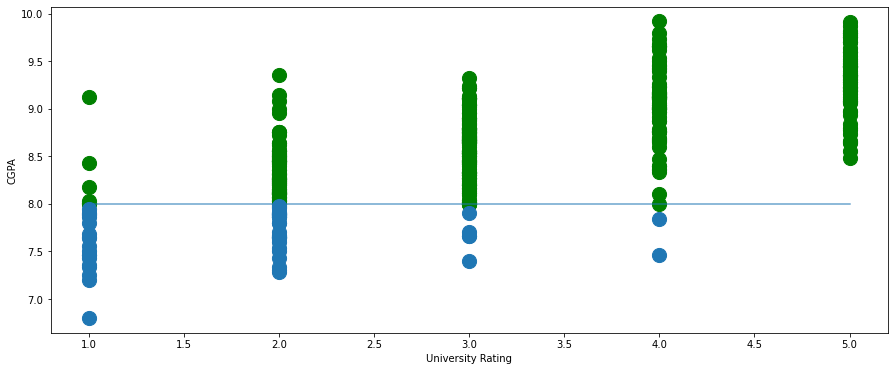

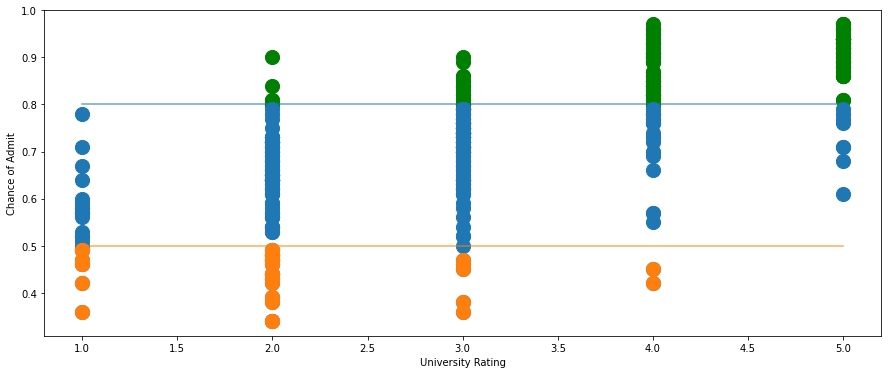

In [25]:
plt.figure(1 , figsize = (15 , 6))
plt_val  = ['GRE Score' , 'TOEFL Score']
n = 0
for i in plt_val:
    n += 1
    plt.subplot(1 , 2 , n)
    z = (df[i].quantile(0.9))
    plt.scatter(x = 'University Rating' , y = i , data = df.where(df[i] >= z) ,
                s = 200 , c = 'green')
    plt.scatter(x = 'University Rating' , y = i , data = df.where(df[i] < z) ,
                s = 200 )
    plt.plot(df['University Rating'] , np.ones((df.shape[0] , 1 ))*z , '-' , alpha = 0.5)
    plt.xlabel('University Rating')
    plt.ylabel(i)
plt.show()

plt.figure(2 , figsize  = (15 , 6))

plt.plot(df['University Rating'] , np.ones((df.shape[0] , 1))*8 , '-' , alpha = 0.5 )
plt.scatter(x = 'University Rating' , y = 'CGPA' ,
            data = df.where(df['CGPA'] >= 8) , s = 200 , c = 'green' )
plt.scatter(x = 'University Rating' , y = 'CGPA' ,
            data = df.where(df['CGPA'] < 8) , s = 200  )

plt.xlabel('University Rating')
plt.ylabel('CGPA')
plt.show()


plt.figure(3 , figsize  = (15 , 6))
for n in [0.8 , 0.5]:
    plt.plot(df['University Rating'] , np.ones((df.shape[0] , 1))*n , '-' , alpha = 0.5 )
plt.scatter(x = 'University Rating' , y = 'Chance of Admit ' ,
            data = df.where(df['Chance of Admit '] >= 0.8) , s = 200 , c = 'green' )
plt.scatter(x = 'University Rating' , y = 'Chance of Admit ' ,
            data = df.where(df['Chance of Admit '] < 0.8) , s = 200  )
plt.scatter(x = 'University Rating' , y = 'Chance of Admit ' ,
            data = df.where(df['Chance of Admit '] < 0.5) , s = 200  )
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.show()

## SOP & LOR

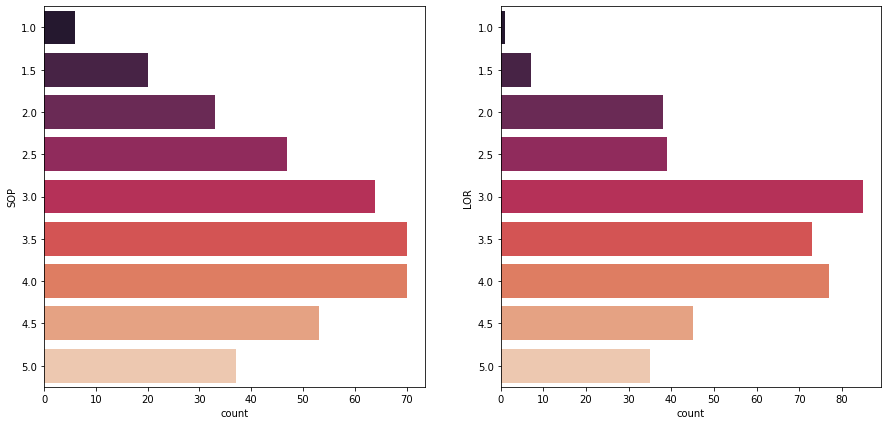

In [26]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for i in ['SOP' , 'LOR ']:
    n += 1
    plt.subplot(1 , 2 , n)
    sns.countplot( y = i , data = df , palette = 'rocket')
plt.show()

## Chance of admit according to SOP and LOR

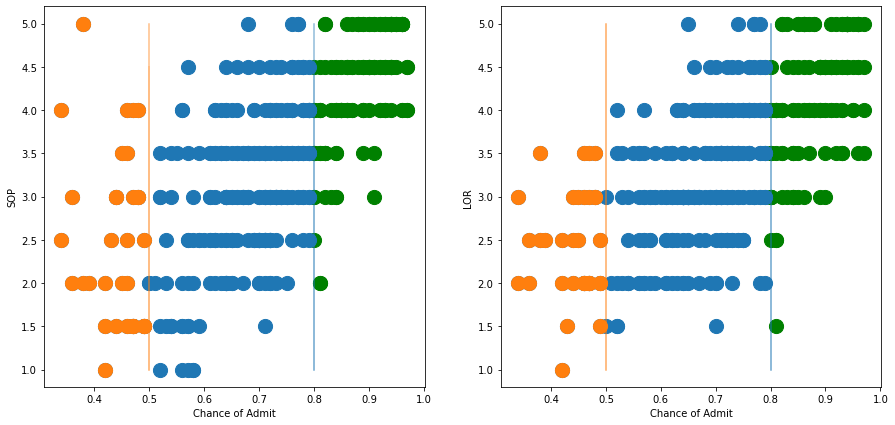

In [27]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for i in ['SOP' , 'LOR ']:
    n += 1
    plt.subplot(1 , 2 , n)
    for z in [0.8 , 0.5]:
        plt.plot(np.ones((df.shape[0] , 1))*z , df[i] , '-' , alpha = 0.5)
    plt.scatter(x = 'Chance of Admit ' , y = i ,
                data = df.where(df['Chance of Admit '] >= 0.8 ) , s = 200 , c = 'green')
    plt.scatter(x = 'Chance of Admit ' , y = i ,
                data = df.where(df['Chance of Admit '] < 0.8 ) , s = 200)
    plt.scatter(x = 'Chance of Admit ' , y = i ,
                data = df.where(df['Chance of Admit '] < 0.5 ) , s = 200)
    plt.xlabel('Chance of Admit')
    plt.ylabel(i)
plt.show()

## splitting data to test and train

In [28]:
final_features_df = pd.DataFrame(df ,columns = ['GRE Score' , 'TOEFL Score' , 'University Rating','SOP' , 'LOR ','CGPA','Research' ,'Chance of Admit '])
x = final_features_df.iloc[: , :-1].values
y = final_features_df.iloc[: , -1].values
y = y.reshape([len(y) , 1])

x_train , x_test , y_train , y_test = train_test_split(x , y , 
                                                      test_size = 0.3, 
                                                      random_state = 111)


## LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression

algo = (LinearRegression())
algo.fit(x_train , y_train)
y_pred = algo.predict(x_test)


In [30]:
print('r2 score {}'.format(r2_score(y_test , y_pred)))

r2 score 0.7687146447814417


In [31]:
print(x)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   116.     4.   ...   4.5    9.45   1.  ]
 [312.   103.     3.   ...   4.     8.78   0.  ]
 [333.   117.     4.   ...   4.     9.66   1.  ]]


# Predicting chance of admit according to user input

In [34]:
algo.predict([[int(input('Enter your GRE score = ')),int(input('Enter your TOEFL score = ')),int(input('Enter University ranking as per your preference = ')),input('Enter your SOP score = '),input('Enter your LOR score = '),input('Enter your CGPA score = '),int(input('Enter your research experience = '))]])

Enter your GRE score = 330
Enter your TOEFL score = 118
Enter University ranking as per your preference = 4
Enter your SOP score = 4.5
Enter your LOR score = 4.5
Enter your CGPA score = 9.5
Enter your research experience = 1


C:\Users\Kushal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([[0.92330413]])